 EDA Report for loan data

infosys project-CreditPathA

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_style('whitegrid')

In [2]:
# Cell 2: Load the Dataset
# Note the path is relative to the root of the project directory
df = pd.read_csv('../Loan_default.csv')

looking at the data first

In [3]:
# Basic Information
print("Data Shape:")
print(df.shape)
print("\nData Info:")
df.info()

Data Shape:
(255347, 18)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255

In [4]:

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


 cleaning up the data

In [5]:
# Cell 5: Check for Duplicate Rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [6]:
# Cell 6: Drop Redundant Columns
# LoanID is a unique identifier and not useful for prediction.
df = df.drop('LoanID', axis=1)
print("Dropped 'LoanID' column.")

Dropped 'LoanID' column.


 exploring the data



In [7]:
# Cell 7: Numerical Summary
print("Summary statistics for numerical columns:")
display(df.describe().T)

Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [8]:
# Cell 8: Categorical Summary
print("\nSummary statistics for categorical columns:")
display(df.describe(include=['object']).T)


Summary statistics for categorical columns:


,count,unique,top,freq
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


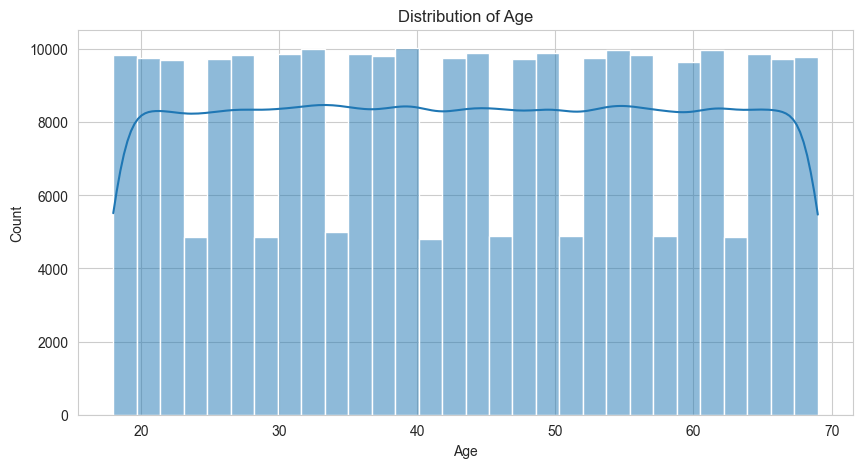

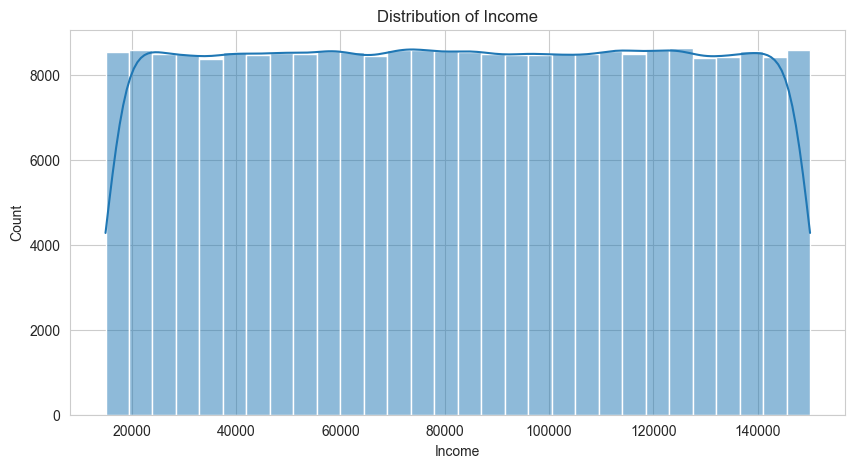

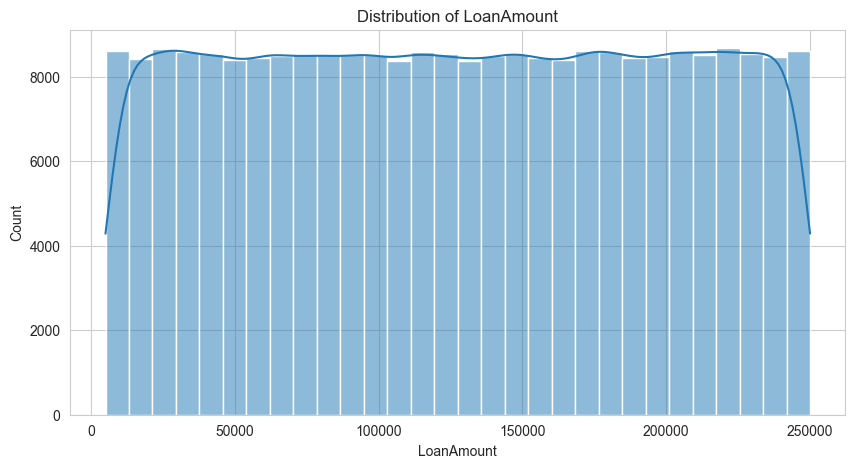

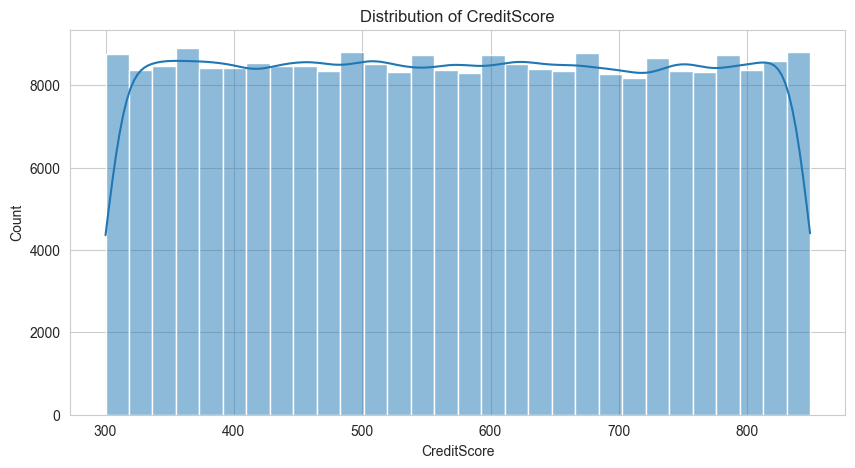

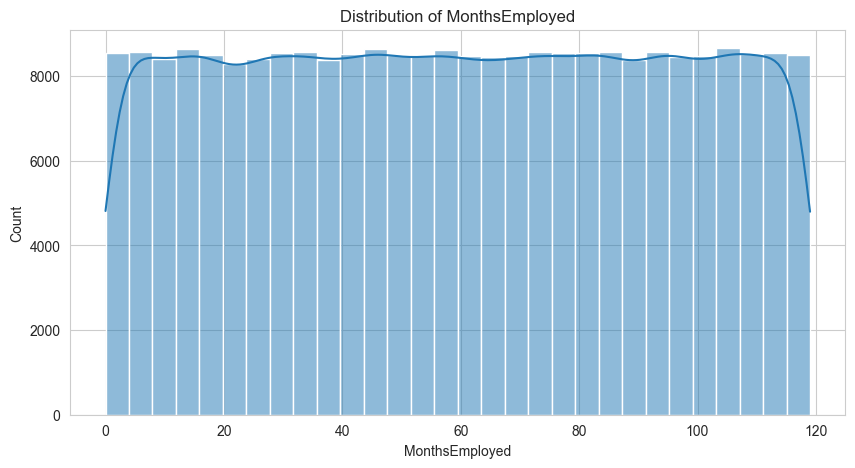

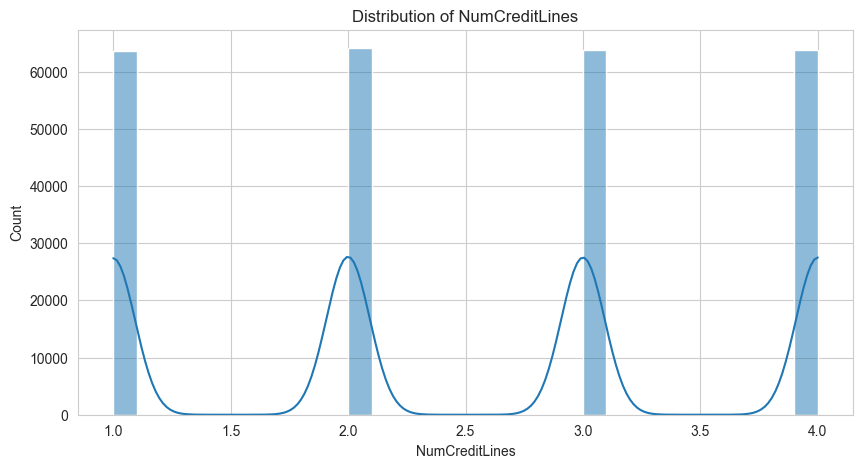

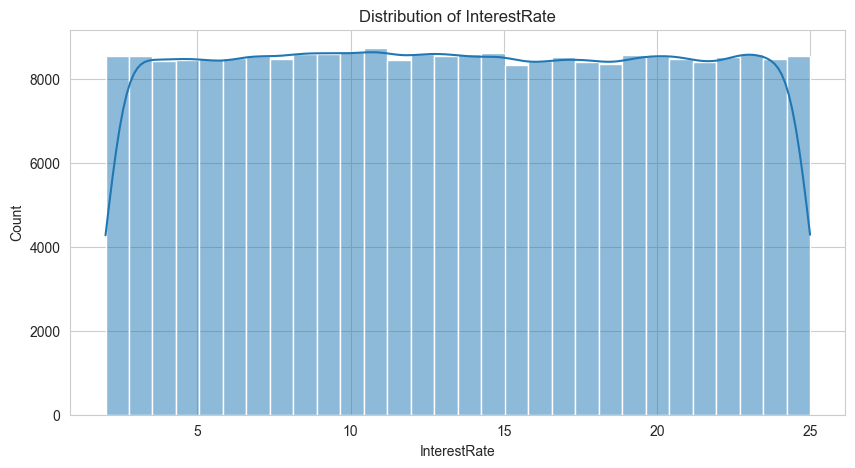

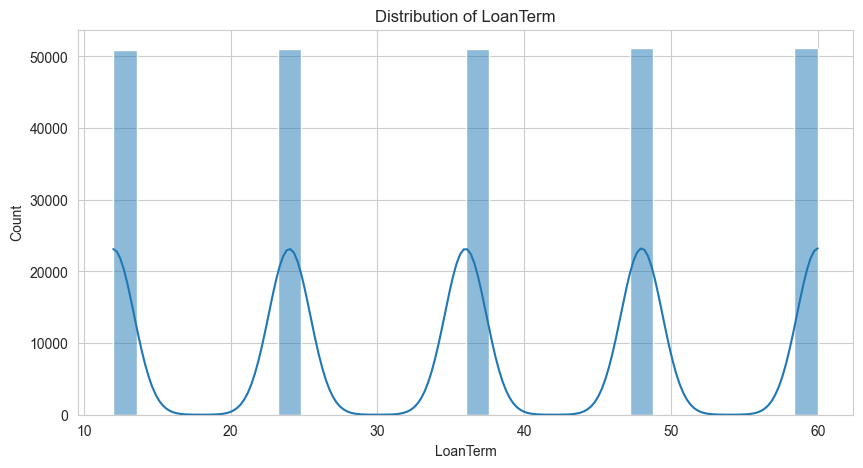

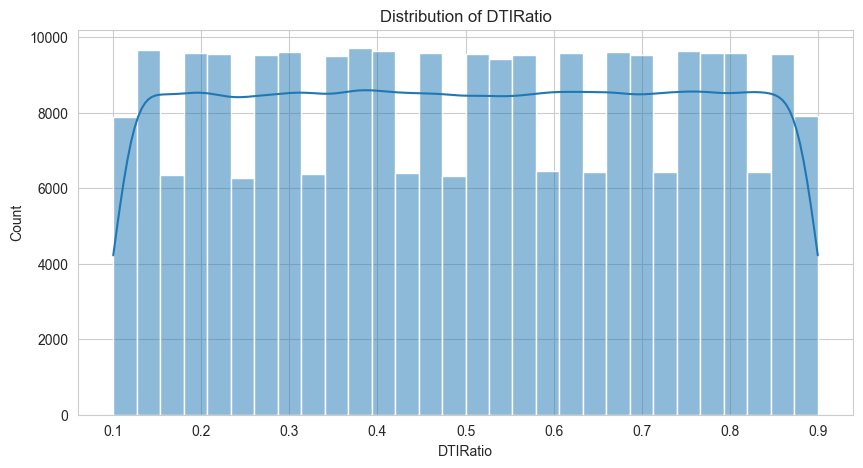

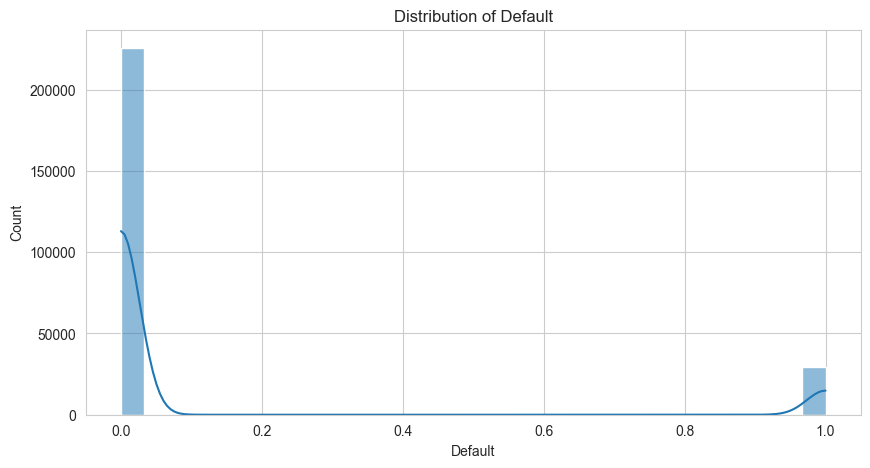

In [11]:

numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### correlation between features

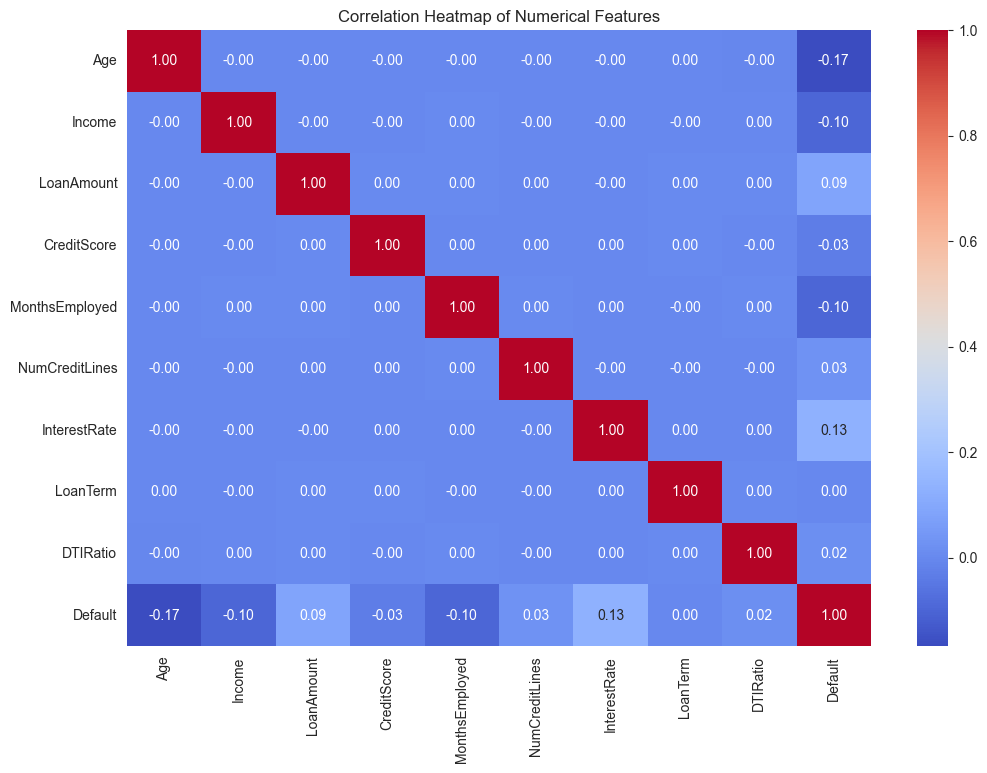

In [12]:
#  Generate and display the correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### checking for outliers

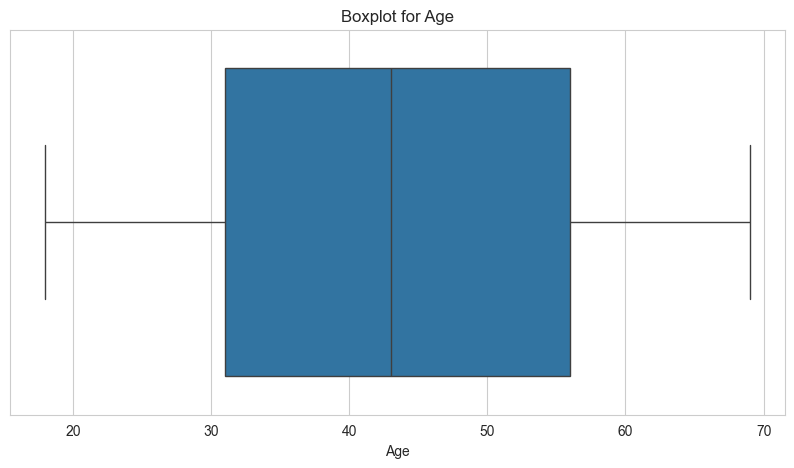

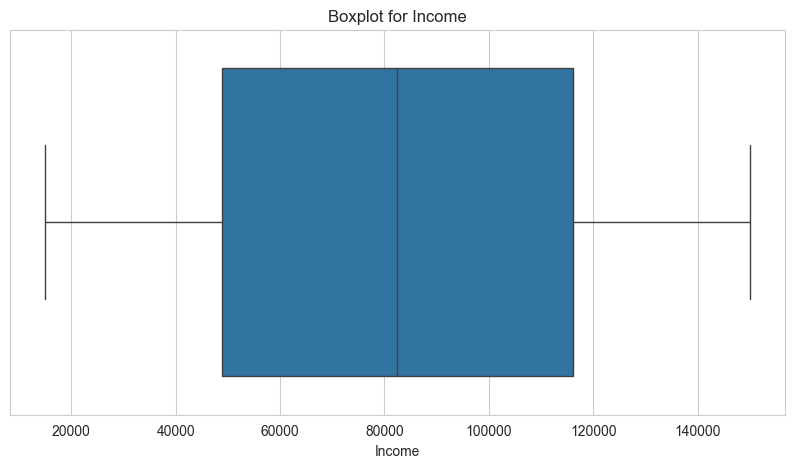

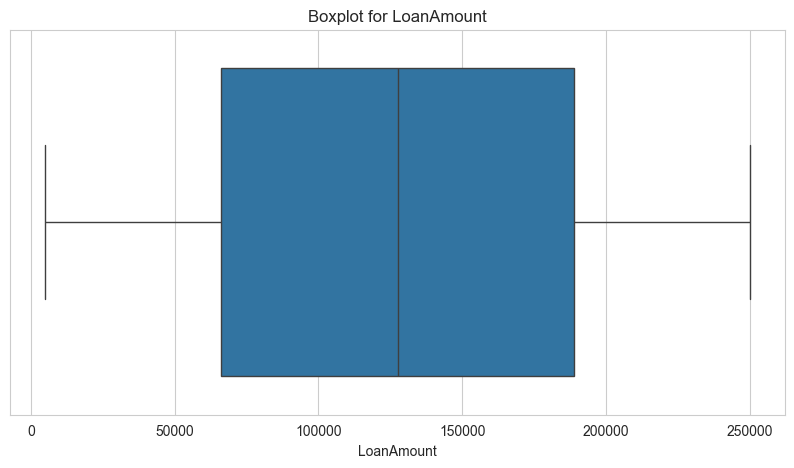

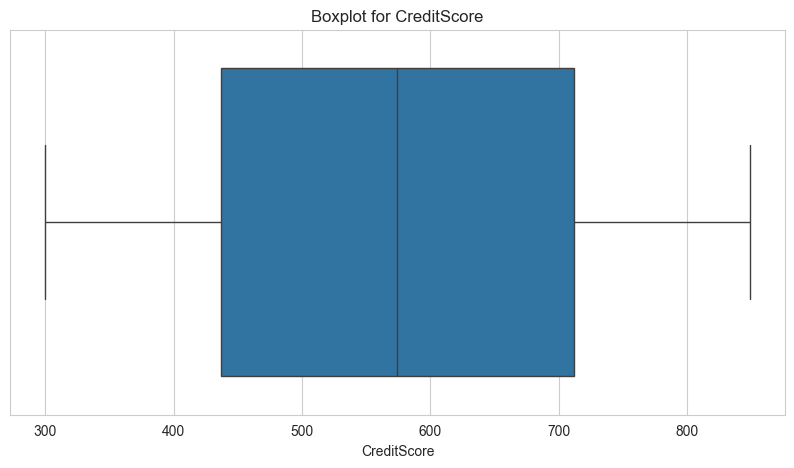

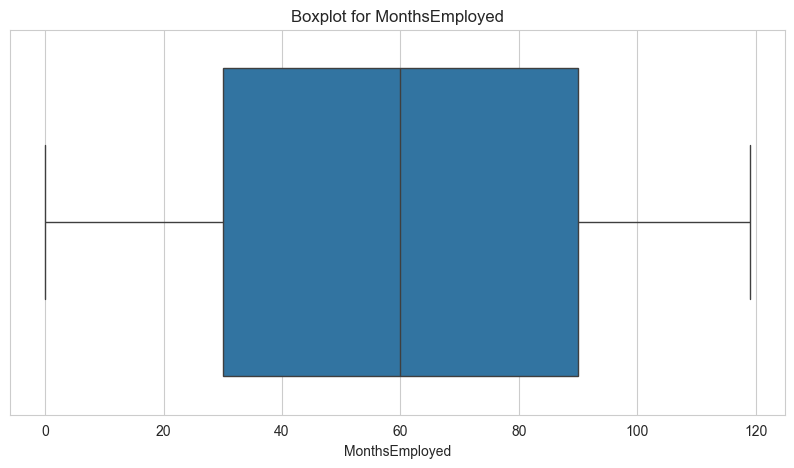

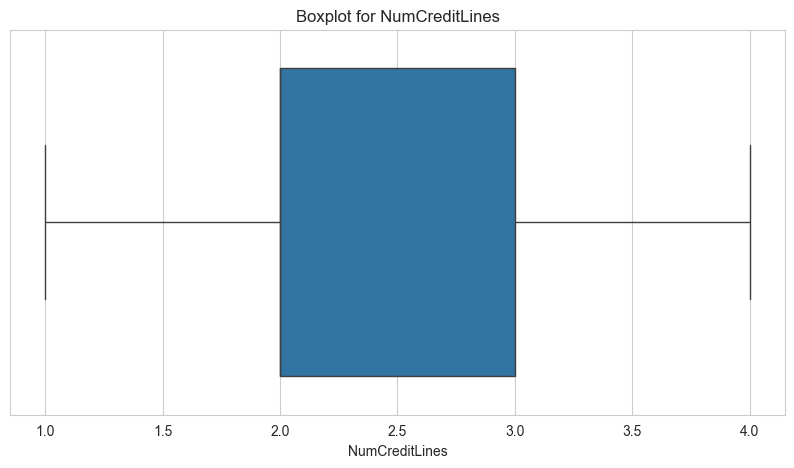

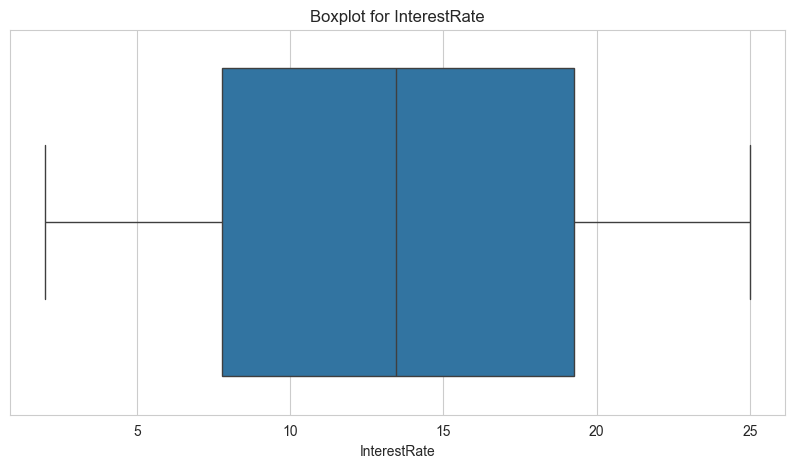

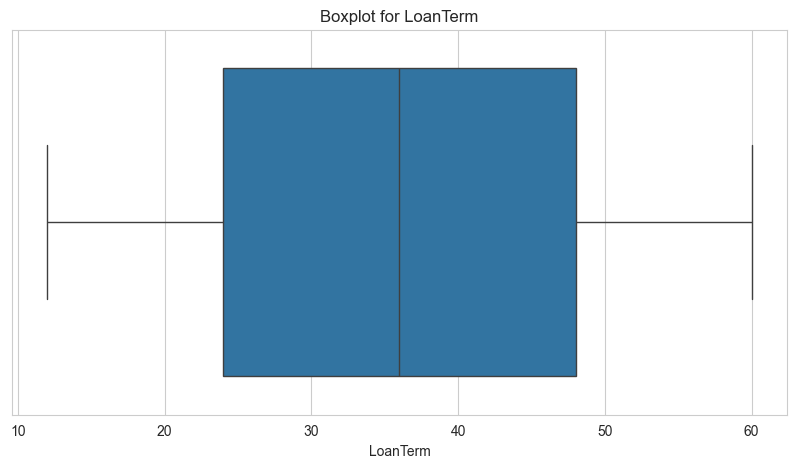

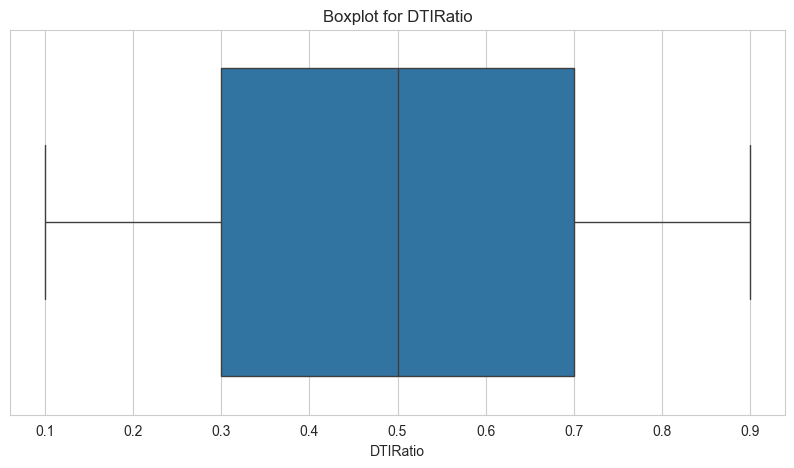

In [14]:

numerical_cols_for_outliers = numerical_cols.drop('Default')

for col in numerical_cols_for_outliers:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### missing values check

In [15]:
# Cell 12: Check for missing values
print("Count of missing values per column:")
print(df.isnull().sum())


Count of missing values per column:
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
